In [2]:
import pandas as pd

In [3]:
df_map=pd.read_csv('santa_clara_pct_cbg_mappings.csv',dtype=object)
df_map=df_map.where(df_map.notnull(), None)
df_map=df_map.rename(columns={"precinct": "County"})
df_map=df_map.dropna()

In [4]:
df_map.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779 entries, 85 to 863
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   County  779 non-null    object
 1   cbg     779 non-null    object
dtypes: object(2)
memory usage: 18.3+ KB


In [5]:
df_map['cbg']=df_map['cbg'].map(lambda x:x.split(','))
df_map=df_map.explode('cbg')

In [6]:
df_map

,County,cbg
85,2306,60855104001
85,2306,60855104002
85,2306,60855104003
86,2305,60855104001
86,2305,60855098011
...,...,...
860,5759,60855073022
861,6677,60855073022
862,6676,60855073022
862,6676,60855073021


In [7]:
df_18=pd.read_csv('18th Congressional.csv')
df_18=df_18.drop(columns=['Registered Voters'])
df_18=df_18.drop([204])
df_18=df_18.rename(columns={'Total':'AR_Total'})
df_18.tail(10)

,County,A_Election_Day,A_Vote_By_Mail,A_Total _Votes,R_Election_Day,R_Vote_By_Mail,R_Total_Votes,AR_Total
194,8862,54,1020,1074,55,765,820,1894
195,8879,52,1336,1388,68,1012,1080,2468
196,8883,81,1311,1392,89,1127,1216,2608
197,8885,55,1177,1232,69,1102,1171,2403
198,8886,2,145,147,0,142,142,289
199,8889,37,1043,1080,58,933,991,2071
200,8898,44,1137,1181,43,934,977,2158
201,8903,46,1372,1418,54,1191,1245,2663
202,8923,0,0,0,0,3,3,3
203,8924,0,7,7,0,6,6,13


In [8]:
df_rv=pd.read_csv('Registered Voters.csv')
df_rv=df_rv.drop([596])
df_rv.tail(10)

,County,Registered Voters,Ballots Cast,Voter Turnout
586,9219,231,188,0.8139
587,9220,2840,2400,0.8451
588,9251,1343,1223,0.9106
589,9252,2146,1842,0.8583
590,9258,1901,1623,0.8538
591,9262,267,227,0.8502
592,9264,1999,1785,0.8929
593,9268,2037,1799,0.8832
594,9275,2049,1673,0.8165
595,9282,5,8,1.6000


In [9]:
df_vote=pd.merge(df_rv,df_18, how='right', on=['County'])
df_vote.tail(10)

,County,Registered Voters,Ballots Cast,Voter Turnout,A_Election_Day,A_Vote_By_Mail,A_Total _Votes,R_Election_Day,R_Vote_By_Mail,R_Total_Votes,AR_Total
194,8862,2560,2262,0.8836,54,1020,1074,55,765,820,1894
195,8879,3228,2921,0.9049,52,1336,1388,68,1012,1080,2468
196,8883,3404,3104,0.9119,81,1311,1392,89,1127,1216,2608
197,8885,3137,2858,0.9111,55,1177,1232,69,1102,1171,2403
198,8886,357,330,0.9244,2,145,147,0,142,142,289
199,8889,2680,2458,0.9172,37,1043,1080,58,933,991,2071
200,8898,2737,2497,0.9123,44,1137,1181,43,934,977,2158
201,8903,3460,3108,0.8983,46,1372,1418,54,1191,1245,2663
202,8923,4,3,0.7500,0,0,0,0,3,3,3
203,8924,17,14,0.8235,0,7,7,0,6,6,13


In [10]:
df_vote['Share_vote']=df_vote['AR_Total']/df_vote['Ballots Cast']
df_vote['A_share']=df_vote['A_Total _Votes']/df_vote['Ballots Cast']
df_vote['R_share']=df_vote['R_Total_Votes']/df_vote['Ballots Cast']

In [11]:
df_vote=df_vote.drop(columns=['A_Election_Day','A_Vote_By_Mail','R_Election_Day','R_Vote_By_Mail'])
df_vote

,County,Registered Voters,Ballots Cast,Voter Turnout,A_Total _Votes,R_Total_Votes,AR_Total,Share_vote,A_share,R_share
0,2001,9,81,9.0000,23,17,40,0.493827,0.283951,0.209877
1,2002,2731,2410,0.8825,1590,574,2164,0.897925,0.659751,0.238174
2,2005,1751,1588,0.9069,1077,364,1441,0.907431,0.678212,0.229219
3,2006,81,73,0.9012,44,17,61,0.835616,0.602740,0.232877
4,2009,4365,3794,0.8692,2402,1025,3427,0.903268,0.633105,0.270163
...,...,...,...,...,...,...,...,...,...,...
199,8889,2680,2458,0.9172,1080,991,2071,0.842555,0.439382,0.403173
200,8898,2737,2497,0.9123,1181,977,2158,0.864237,0.472968,0.391270
201,8903,3460,3108,0.8983,1418,1245,2663,0.856821,0.456242,0.400579
202,8923,4,3,0.7500,0,3,3,1.000000,0.000000,1.000000


In [12]:
df_vote=pd.merge(df_vote,df_map, how='left', on=['County'])

In [13]:
df_vote=df_vote.dropna(subset=['cbg'])

In [14]:
df_vote

,County,Registered Voters,Ballots Cast,Voter Turnout,A_Total _Votes,R_Total_Votes,AR_Total,Share_vote,A_share,R_share,cbg
0,2001,9,81,9.0000,23,17,40,0.493827,0.283951,0.209877,60855117071
1,2002,2731,2410,0.8825,1590,574,2164,0.897925,0.659751,0.238174,60855116091
2,2005,1751,1588,0.9069,1077,364,1441,0.907431,0.678212,0.229219,60855115003
3,2006,81,73,0.9012,44,17,61,0.835616,0.602740,0.232877,60855094012
4,2009,4365,3794,0.8692,2402,1025,3427,0.903268,0.633105,0.270163,60855115002
...,...,...,...,...,...,...,...,...,...,...,...
289,8886,357,330,0.9244,147,142,289,0.875758,0.445455,0.430303,60855119091
290,8889,2680,2458,0.9172,1080,991,2071,0.842555,0.439382,0.403173,60855119091
291,8889,2680,2458,0.9172,1080,991,2071,0.842555,0.439382,0.403173,60855119101
292,8898,2737,2497,0.9123,1181,977,2158,0.864237,0.472968,0.391270,60855119113


In [15]:
cbg_list=df_vote['cbg'].tolist()
cbg_list=['0'+x for x in cbg_list]

In [16]:
downlowad_code=",".join(str(i) for i in cbg_list)
print(downlowad_code)

060855117071,060855116091,060855115003,060855094012,060855115002,060855093021,060855094041,060855117012,060855117013,060855093021,060855108031,060855108032,060855114004,060855114001,060855114002,060855114003,060855114001,060855114002,060855114003,060855113021,060855113022,060855113023,060855112001,060855112002,060855110002,060855110005,060855117051,060855094012,060855117043,060855117043,060855117071,060855117012,060855117042,060855117042,060855117051,060855117041,060855117043,060855105001,060855105002,060855104001,060855098011,060855098012,060855105003,060855102001,060855100023,060855100015,060855100016,060855078052,060855101001,060855077031,060855117071,060855130001,060855115004,060855069003,060855068014,060855069004,060855069003,060855072031,060855072061,060855072031,060855069003,060855070012,060855070022,060855070012,060855070011,060855072053,060855072051,060855068012,060855070012,060855117021,060855117071,060855117071,060855117071,060855077032,060855117071,060855117071,060855047001

## Demographic

In [17]:
df_age=pd.read_csv('Age.csv')
df_race=pd.read_csv('Race.csv')
df_edu=pd.read_csv('Education.csv')
df_income=pd.read_csv('Income.csv')

In [18]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Block Group        204 non-null    object 
 1   Median Age         204 non-null    float64
 2   Male Median Age    204 non-null    float64
 3   Female Median Age  204 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.5+ KB


In [19]:
df_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Block Group        197 non-null    object
 1   White              197 non-null    int64 
 2   Black              197 non-null    int64 
 3   Indian and Alaska  197 non-null    int64 
 4   Asian              197 non-null    int64 
 5   Pacific            197 non-null    int64 
 6   Other              197 non-null    int64 
 7   Two races          197 non-null    int64 
 8   Two or more        197 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 14.0+ KB


In [20]:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Block Group            197 non-null    object
 1   Total educated number  197 non-null    int64 
 2   Less than 9th          197 non-null    int64 
 3   9th to 12th            197 non-null    int64 
 4   High school            197 non-null    int64 
 5   College no degree      197 non-null    int64 
 6   Associate              197 non-null    int64 
 7   Bachelor               197 non-null    int64 
 8   Graduate               197 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 14.0+ KB


In [21]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Block Group              203 non-null    object 
 1   Median household income  198 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB


In [22]:
df_demo=pd.merge(df_age,df_race, how='outer', on=['Block Group'])
df_demo=pd.merge(df_demo,df_edu,how='outer', on=['Block Group'])
df_demo=pd.merge(df_demo,df_income,how='outer', on=['Block Group'])

In [23]:
df_demo=df_demo.drop_duplicates()

In [24]:
df_demo['ct1']=df_demo['Block Group'].map(lambda x:x. split(',')[1]).str[13:18].str.strip()
df_demo['ct2']=df_demo['Block Group'].map(lambda x:x. split(',')[1]).str[19:].str.strip()
df_demo['ct2']=df_demo['ct2'].replace('','00')
df_demo['bck']=df_demo['Block Group'].map(lambda x:x. split(',')[0]).str[-1:]
df_demo

,Block Group,Median Age,Male Median Age,Female Median Age,White,Black,Indian and Alaska,Asian,Pacific,Other,...,9th to 12th,High school,College no degree,Associate,Bachelor,Graduate,Median household income,ct1,ct2,bck
0,"Block Group 2, Census Tract 5068.01, Santa Cla...",53.6,54.0,53.5,996,27,8,427,4,43,...,44,72,306,32,234,339,102353.0,5068,01,2
16,"Block Group 4, Census Tract 5068.01, Santa Cla...",45.4,46.5,45.1,530,5,3,203,0,10,...,13,38,29,39,284,159,236979.0,5068,01,4
32,"Block Group 3, Census Tract 5069, Santa Clara ...",53.6,53.4,53.9,1446,9,3,416,1,45,...,20,99,219,88,601,420,200602.0,5069,00,3
33,"Block Group 4, Census Tract 5069, Santa Clara ...",48.6,37.8,50.6,1968,0,1,303,1,23,...,37,308,152,115,503,628,172250.0,5069,00,4
34,"Block Group 2, Census Tract 5070.02, Santa Cla...",56.0,63.1,49.8,832,3,2,127,0,23,...,6,59,71,26,420,504,250000.0,5070,02,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,"Block Group 1, Census Tract 5119.16, Santa Cla...",34.9,37.8,33.6,953,54,17,496,13,252,...,29,181,372,91,275,152,99929.0,5119,16,1
516,"Block Group 2, Census Tract 5119.16, Santa Cla...",44.2,42.7,46.4,1305,19,12,1026,3,88,...,28,164,218,164,611,540,183281.0,5119,16,2
517,"Block Group 2, Census Tract 5120.24, Santa Cla...",37.8,36.5,38.1,679,91,10,402,5,204,...,33,121,184,34,472,200,131549.0,5120,24,2
518,"Block Group 1, Census Tract 5120.27, Santa Cla...",45.6,36.9,51.1,842,81,16,312,3,315,...,132,239,360,24,387,204,49936.0,5120,27,1


In [25]:
df_demo['cbg']='6085'+df_demo['ct1']+df_demo['ct2']+df_demo['bck']
df_demo=df_demo.drop(columns=['ct1','ct2','bck','Block Group','Total educated number'])
df_demo

,Median Age,Male Median Age,Female Median Age,White,Black,Indian and Alaska,Asian,Pacific,Other,Two races,Two or more,Less than 9th,9th to 12th,High school,College no degree,Associate,Bachelor,Graduate,Median household income,cbg
0,53.6,54.0,53.5,996,27,8,427,4,43,197,212,59,44,72,306,32,234,339,102353.0,60855068012
16,45.4,46.5,45.1,530,5,3,203,0,10,71,78,7,13,38,29,39,284,159,236979.0,60855068014
32,53.6,53.4,53.9,1446,9,3,416,1,45,197,211,0,20,99,219,88,601,420,200602.0,60855069003
33,48.6,37.8,50.6,1968,0,1,303,1,23,176,181,0,37,308,152,115,503,628,172250.0,60855069004
34,56.0,63.1,49.8,832,3,2,127,0,23,94,108,0,6,59,71,26,420,504,250000.0,60855070022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,34.9,37.8,33.6,953,54,17,496,13,252,311,336,31,29,181,372,91,275,152,99929.0,60855119161
516,44.2,42.7,46.4,1305,19,12,1026,3,88,246,262,0,28,164,218,164,611,540,183281.0,60855119162
517,37.8,36.5,38.1,679,91,10,402,5,204,219,242,19,33,121,184,34,472,200,131549.0,60855120242
518,45.6,36.9,51.1,842,81,16,312,3,315,217,233,23,132,239,360,24,387,204,49936.0,60855120271


In [26]:
df_final=pd.merge(df_vote,df_demo,how='left',on=['cbg'])
df_final.dropna(axis=0, how='any', inplace=True)

In [27]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 284
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   County                   243 non-null    object 
 1   Registered Voters        243 non-null    int64  
 2   Ballots Cast             243 non-null    int64  
 3   Voter Turnout            243 non-null    float64
 4   A_Total _Votes           243 non-null    int64  
 5   R_Total_Votes            243 non-null    int64  
 6   AR_Total                 243 non-null    int64  
 7   Share_vote               243 non-null    float64
 8   A_share                  243 non-null    float64
 9   R_share                  243 non-null    float64
 10  cbg                      243 non-null    object 
 11  Median Age               243 non-null    float64
 12  Male Median Age          243 non-null    float64
 13  Female Median Age        243 non-null    float64
 14  White                    2

## Regression

In [28]:
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
df_final2=df_final.drop(columns=['Registered Voters','Ballots Cast','A_Total _Votes','R_Total_Votes','AR_Total','County','cbg'])

In [30]:
df_final2.head(10)

,Voter Turnout,Share_vote,A_share,R_share,Median Age,Male Median Age,Female Median Age,White,Black,Indian and Alaska,...,Two races,Two or more,Less than 9th,9th to 12th,High school,College no degree,Associate,Bachelor,Graduate,Median household income
0,9.0000,0.493827,0.283951,0.209877,55.3,46.4,65.5,976.0,10.0,4.0,...,116.0,123.0,15.0,9.0,227.0,139.0,35.0,523.0,663.0,127778.0
1,0.8825,0.897925,0.659751,0.238174,38.4,35.6,42.3,1870.0,111.0,0.0,...,325.0,355.0,16.0,5.0,56.0,219.0,39.0,548.0,892.0,132118.0
3,0.9012,0.835616,0.602740,0.232877,32.5,32.6,32.3,348.0,7.0,1.0,...,94.0,98.0,0.0,21.0,5.0,102.0,63.0,187.0,185.0,189464.0
5,0.8890,0.912137,0.646650,0.265487,43.1,43.3,42.8,1003.0,29.0,2.0,...,178.0,184.0,0.0,73.0,17.0,79.0,73.0,274.0,385.0,190694.0
6,0.8890,0.912137,0.646650,0.265487,38.8,38.6,39.0,595.0,17.0,5.0,...,126.0,135.0,2.0,34.0,10.0,128.0,0.0,258.0,446.0,240192.0
7,0.8723,0.875522,0.580668,0.294854,47.7,53.1,43.5,1165.0,4.0,1.0,...,133.0,137.0,0.0,11.0,170.0,98.0,74.0,553.0,552.0,250000.0
8,0.8723,0.875522,0.580668,0.294854,48.5,48.7,48.1,525.0,1.0,2.0,...,80.0,84.0,0.0,27.0,17.0,39.0,8.0,256.0,355.0,250000.0
9,0.8310,0.847458,0.508475,0.338983,43.1,43.3,42.8,1003.0,29.0,2.0,...,178.0,184.0,0.0,73.0,17.0,79.0,73.0,274.0,385.0,190694.0
10,0.8890,0.901132,0.639878,0.261254,41.4,38.5,41.8,589.0,13.0,0.0,...,78.0,89.0,9.0,47.0,171.0,199.0,16.0,286.0,298.0,231625.0
11,0.8890,0.901132,0.639878,0.261254,41.8,44.5,39.1,561.0,30.0,2.0,...,105.0,113.0,0.0,39.0,74.0,15.0,40.0,205.0,422.0,143810.0


In [31]:
df_dep=df_final2[['Voter Turnout','Share_vote','A_share','R_share']]
df_dep=df_dep.iloc[1:,:]

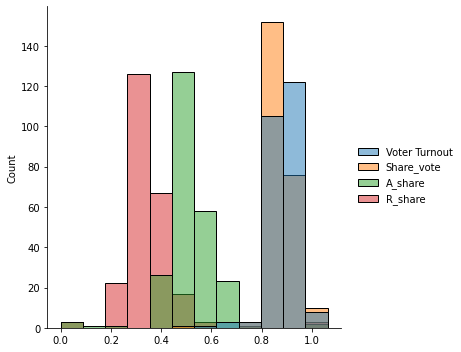

In [32]:
sns.displot(df_dep)

In [33]:
df_indep=df_final2.iloc[1:, 5:]
df_indep

,Male Median Age,Female Median Age,White,Black,Indian and Alaska,Asian,Pacific,Other,Two races,Two or more,Less than 9th,9th to 12th,High school,College no degree,Associate,Bachelor,Graduate,Median household income
1,35.6,42.3,1870.0,111.0,0.0,1058.0,4.0,83.0,325.0,355.0,16.0,5.0,56.0,219.0,39.0,548.0,892.0,132118.0
3,32.6,32.3,348.0,7.0,1.0,333.0,3.0,31.0,94.0,98.0,0.0,21.0,5.0,102.0,63.0,187.0,185.0,189464.0
5,43.3,42.8,1003.0,29.0,2.0,368.0,3.0,61.0,178.0,184.0,0.0,73.0,17.0,79.0,73.0,274.0,385.0,190694.0
6,38.6,39.0,595.0,17.0,5.0,967.0,2.0,24.0,126.0,135.0,2.0,34.0,10.0,128.0,0.0,258.0,446.0,240192.0
7,53.1,43.5,1165.0,4.0,1.0,574.0,3.0,23.0,133.0,137.0,0.0,11.0,170.0,98.0,74.0,553.0,552.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,44.5,47.3,879.0,25.0,3.0,527.0,2.0,76.0,180.0,201.0,7.0,33.0,21.0,133.0,46.0,248.0,171.0,205000.0
279,40.3,43.6,1024.0,30.0,8.0,1177.0,1.0,48.0,178.0,196.0,11.0,49.0,78.0,203.0,175.0,556.0,481.0,215735.0
280,56.6,49.9,992.0,15.0,3.0,553.0,1.0,20.0,171.0,186.0,19.0,6.0,190.0,203.0,71.0,598.0,382.0,202349.0
283,48.0,53.7,641.0,1.0,0.0,293.0,3.0,20.0,105.0,111.0,0.0,29.0,116.0,83.0,53.0,428.0,225.0,158333.0


### Turnout

In [34]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.formula.api as ols

In [35]:
lm=sm.OLS(df_dep['Voter Turnout'],df_indep)
reg_results=lm.fit()
reg_results.summary()
print(reg_results.summary())

                                 OLS Regression Results                                
Dep. Variable:          Voter Turnout   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              979.1
Date:                Mon, 22 Aug 2022   Prob (F-statistic):                   8.52e-202
Time:                        10:55:24   Log-Likelihood:                          216.85
No. Observations:                 242   AIC:                                     -397.7
Df Residuals:                     224   BIC:                                     -334.9
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

### Winner

In [36]:
lm=sm.OLS(df_dep['Share_vote'],df_indep)
reg_results=lm.fit()
reg_results.summary()
print(reg_results.summary())

                                 OLS Regression Results                                
Dep. Variable:             Share_vote   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              882.7
Date:                Mon, 22 Aug 2022   Prob (F-statistic):                   7.98e-197
Time:                        10:55:24   Log-Likelihood:                          206.92
No. Observations:                 242   AIC:                                     -377.8
Df Residuals:                     224   BIC:                                     -315.0
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [37]:
lm=sm.OLS(df_dep['A_share'],df_indep)
reg_results=lm.fit()
reg_results.summary()
print(reg_results.summary())

                                 OLS Regression Results                                
Dep. Variable:                A_share   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                              225.6
Date:                Mon, 22 Aug 2022   Prob (F-statistic):                   1.55e-132
Time:                        10:55:24   Log-Likelihood:                          168.39
No. Observations:                 242   AIC:                                     -300.8
Df Residuals:                     224   BIC:                                     -238.0
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [38]:
lm=sm.OLS(df_dep['R_share'],df_indep)
reg_results=lm.fit()
reg_results.summary()
print(reg_results.summary())

                                 OLS Regression Results                                
Dep. Variable:                R_share   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.918
Method:                 Least Squares   F-statistic:                              151.9
Date:                Mon, 22 Aug 2022   Prob (F-statistic):                   1.36e-114
Time:                        10:55:24   Log-Likelihood:                          209.72
No. Observations:                 242   AIC:                                     -383.4
Df Residuals:                     224   BIC:                                     -320.6
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------